# Working with formulas.norm.txt file from https://www.kaggle.com/datasets/rvente/im2latex170k

In [9]:
from matplotlib import pyplot as plt
import json
import re
from collections import Counter

In [4]:
FILE_NAME = "../dataset_NG.txt"
TMP_FILE = "../tmp_dataset_NG.txt"
TMP_FILE_2 = "../tmp_dataset_NG_2.txt"
FINAL_DATASET = "../dataset_NG.json"
TOKEN_RATE = 100  # blacklisting token if it's less freq than this value

In [2]:
# get all tokens

# tokens = set()
tokens = Counter()

with open(FILE_NAME, "r+") as file:
    for line in file:
        line = line.replace("\n", "")
        [tokens.update([token]) for token in list(filter(lambda x: len(x) != 0, line.split(" ")))]
        # [tokens.add(token) for token in list(filter(lambda x: len(x) != 0, line.split(" ")))]

In [3]:
tokens.most_common(1000)

[('}', 1398342),
 ('{', 1398338),
 ('_', 535637),
 ('^', 288339),
 (')', 267334),
 ('(', 267068),
 ('1', 215091),
 (',', 202837),
 ('2', 165929),
 ('=', 145978),
 ('-', 126271),
 ('0', 126209),
 ('i', 109175),
 ('n', 92123),
 ('+', 87319),
 ('\\mathrm', 80557),
 ('t', 78718),
 ('x', 77992),
 ('.', 64175),
 ('k', 57511),
 ('\\frac', 56847),
 ('a', 54530),
 ('s', 53332),
 ('m', 52322),
 ('d', 51594),
 ('r', 48807),
 ('e', 48500),
 ('p', 48235),
 ('c', 43923),
 ('|', 43139),
 ('3', 41332),
 ('j', 40202),
 ('\\mathcal', 40069),
 ('f', 38473),
 ('\\in', 36738),
 ('l', 35332),
 ('T', 32431),
 ('u', 32121),
 ('/', 31393),
 ('R', 31123),
 ('\\,', 30672),
 ('\\prime', 30539),
 ('A', 30429),
 ('g', 30290),
 ('o', 29155),
 ('S', 28480),
 ('N', 27760),
 ('\\mathbf', 27526),
 ('\\alpha', 27454),
 ('4', 27023),
 ('y', 26216),
 ('C', 25927),
 ('M', 25811),
 ('P', 25549),
 ('[', 25464),
 ('b', 25274),
 ('L', 25209),
 (']', 25043),
 ('X', 24983),
 ('\\mathbb', 24926),
 ('\\right)', 24891),
 ('\\left(',

In [4]:
blacklist = []

for k, v in tokens.items():
    if v < TOKEN_RATE:
        blacklist.append(k)

In [15]:
accepted = []
with open(FILE_NAME, "r+") as file:
    for line in file:
        line = line.replace("\n", "")
        tok = list(filter(lambda x:len(x) != 0, line.split(" ")))
        if not any([substring in tok for substring in blacklist]):
            accepted.append(line)

In [22]:
with open(TMP_FILE, "w+") as file:
    for line in accepted:
        file.write(line + "\n")

In [ ]:
# \left\lbrace --> \left\{
# \right\rbrace --> \right\}

# \left\langle --> \left<
# \right\rangle --> \right>

# \left\vert --> \left|
# \right\vert --> \right|
# \left\Vert --> \left\|
# \right\Vert --> \right\|
# \left\lvert --> \left|
# \right\rvert --> \right|

# \: --> ~
# \; --> ~
# \, --> ~
# \mathrel --> ~
# \qquad --> ~

# \bm --> \boldsymbol

# possibly do \overline --> \bar

# \cal --> \mathcal

# \vert --> |

# \ast --> *

# \textup --> \textrm
# \textnormal --> \textrm
# \textsc --> \textrm

# \parallel --> \Vert

# \bot --> \perp

# \mathbfit --> \boldsymbol

# \nicefrac --> \frac

# \mathbbold --> \boldsymbol

# \scr --> \mathcal

# \bmath --> \boldsymbol
# \mathbold --> \boldsymbol

# del \ensuremath
# del \!
# del \displaystyle
# del \xspace
# del \mathds
# del \l
# del \r
# del \mathit
# del \smash
# del \pmb
# del \lb
# del \rb
# del \mathbin
# del \coloneqq
# del \unit
# del \scalebox
# del \mathbbm
# del \substack
# del \vphantom
# del \texttt
# del \nonumber
# del \small
# del \hspace
# del \relax
# del \monad
# del \textsf
# del \vspace
# del \mathtt
# del [object
# del Object]
# del \mathord
# possibly del \R, but many ^ symbols are empty (\to \R ^ { + }), so moved to blacklist

In [16]:
# get rid of \operatorname


final = []

with open(TMP_FILE, "r+") as file, open(TMP_FILE_2, "w+") as file2:
    for line in file:
        line = line.replace("\n", "")
    
        if not "operatorname" in line:
            file2.write(line + "\n")
            continue
        
        r = re.findall(r"\\operatorname {[^\}]+}", line) + re.findall(r"\\operatorname\* {[^\}]+}", line)
        for sub in r:
            rr = re.findall(r"{[^\}]+}", sub)
            res = "\\mathrm { " + rr[0].strip("{}").replace(" ", "") + " }"
            line = line.replace(sub, res, 1)
        print(line)
        file2.write(line + "\n")
# NOTE: Some of 'operatorname'  tokens are still in dataset, clean in manually

\mathrm { Tr } _ { \lambda ^ { \prime } }
\mathrm { log } M _ { \mathrm { B H } } / M _ { \odot }
\partial \mathrm { log } \sqrt [ ] { W }
\mathscr { C } ( \varrho ) : = \mathrm { min } _ { \sigma \in I } \mathsf { S } ( \varrho \Vert \sigma ) .
{ } ^ { T } [ f , g ] \in \mathrm { ker } ( 1 - \tilde { M } ^ { 2 } )
\mathrm { Ric } _ { n _ { 2 } } ( v , v ) = 0
Q ( \mathcal { T } _ { n } ^ { \varepsilon } ) = \mathbf { p } _ { \varepsilon } ( \boldsymbol { \alpha } _ { n } ^ { \varepsilon } , \mathbf { s } _ { n } ^ { \varepsilon } ) \mathrm { exp } \left( i \boldsymbol { \alpha } _ { n } ^ { \varepsilon } \right) = \Gamma _ { \varepsilon } ^ { \mathbf { s } _ { n } ^ { \varepsilon } } \left( \boldsymbol { \alpha } _ { n } ^ { \varepsilon } \right) .
a + 2 \sqrt { \mathrm { log } \frac 2 { b _ { \varepsilon , \delta } ( t , x ) } } = - \frac { \mathrm { log } ( 2 r ) } { \sqrt { \lambda _ { \varepsilon , \delta } ( t , x ) } }
T ^ { - 1 / 7 } ( \mathrm { log } N ) \to 0
g ( \sigma _ { E

In [50]:

# post-blacklisting
blacklist = ["\\scriptsize", "\\mathlarger", "\\mathop", "\\mathsf",
             "\\R", "\\eps", "\\sf", "\\norm", "\\scriptscriptstyle",
             "\\farcs", "\\arcmin", "\\degr", "\\LS", "\\\multii",
             "\\super", "\\E", "\\SI", "\\bu", "\\set", "\\mathlarger",
             "\\bx", "\\kern", "\\Pgt", "\\phantom", "\\id", "\\D",
             "\\textstyle", "\\mbf", "\\bsig", "\\Z", "\\V", "\\C",
             "\\la", "\\scriptstyle", "\\llbracket", "\\rrbracket",
             "\\RR", "\\a", "\\vv", "\\cF", "\\emph", "\\x", "\\bv",
             "\\T", "\bsig", "\\IR", "\\De", "\\o", "\\NN", "\\F",
             "\\N", "\\p", "\\sharp", "\\T", "\\g", "\\s", "\\/",
             "\\ybs", "\\bs", "\\LS", "\\mkern", "\\pos", "\\cA",
             "\\bb", "\\A", "\\footnotesize", "\\K", "\\mcl",
             "\\E", "\\etc", "\\g", "\\d", "\\m", "\\type", "\\ra",
             "\\EE", "\\ref", "\\sc", "\\AA", "\\Hom", "\\dd",
             "\\allowbreak", "\\upphi", "\\cC", "\\t", "\\ulcorner",
             "\\urcorner", "\\B", "\\b", "\\inv", "\\msr", "\\Ga",
             "\\vecg", "\\hdots", "\\Varid", "\\raisebox", "\\dom",
             "\\one", "\\si", "\\XiAd", "\\round", "\\mc", "\\i",
             "\\td", "\\XiSA", "\\defeq", "\\shat", "\\protect",
             "\\ep", "\\it", "\\intercal", "\\ceil", "\\mb", "\\EuScript",
             "\\eqdef", "\\bbS", "\\vC", "\\bA", "\\cO", "\\vect",
             "\\drm", "\\Rr", "\\kone", "\\eqref", "\\dgraph", "\\by",
             "\\vecx", "\\bsm", "\\PP", "\\rescontext", "\\meter",
             "\\vals", "\\sIndex", "\\rlap", "\\dist", "\\hline",
             "\\ta", "\\Box", "\\bbA", "\\Q", "\\rtimes", "\\e", "\\Atbb", 
             "\\Tcal", "\\mat", "\\sun"]  # add '\' ?

with open(TMP_FILE_2, "r") as f, open(FINAL_DATASET, "r+") as f1:
    dat = json.load(f1)
    l = []
    for idx, line in enumerate(f):
        line = line.replace("\n", "")
        tok = list(filter(lambda x:len(x) != 0, line.split(" ")))
        if not any(sym in blacklist for sym in tok) and len(tok) < 320:
            l.append({"caption": line})
    l = [dict(t) for t in {tuple(d.items()) for d in l}]
    
    l = [{"image_id": str(idx), "caption": el["caption"]} for idx, el in enumerate(l)]
    
    dat["annotations"] = l
    json.dump(dat, f1, indent=4)

(array([1.100e+01, 1.500e+01, 6.400e+01, 1.007e+03, 1.488e+03, 1.125e+03,
        1.348e+03, 3.755e+03, 1.530e+03, 2.004e+03, 3.187e+03, 1.533e+03,
        1.635e+03, 1.512e+03, 3.241e+03, 1.746e+03, 1.666e+03, 1.858e+03,
        3.547e+03, 1.793e+03, 1.881e+03, 3.801e+03, 1.873e+03, 1.901e+03,
        1.829e+03, 3.486e+03, 1.723e+03, 1.712e+03, 3.161e+03, 1.531e+03,
        1.466e+03, 1.508e+03, 2.809e+03, 1.334e+03, 1.373e+03, 1.316e+03,
        2.400e+03, 1.189e+03, 1.121e+03, 2.065e+03, 9.790e+02, 8.920e+02,
        9.180e+02, 1.851e+03, 8.610e+02, 7.740e+02, 7.860e+02, 1.543e+03,
        7.030e+02, 6.890e+02, 1.302e+03, 5.850e+02, 6.090e+02, 5.620e+02,
        1.079e+03, 5.050e+02, 4.900e+02, 8.960e+02, 4.540e+02, 4.280e+02,
        3.910e+02, 7.660e+02, 3.500e+02, 3.420e+02, 3.090e+02, 6.860e+02,
        3.250e+02, 2.580e+02, 5.380e+02, 2.450e+02, 2.330e+02, 2.420e+02,
        4.160e+02, 1.660e+02, 2.170e+02, 1.740e+02, 3.590e+02, 1.660e+02,
        1.650e+02, 3.220e+02, 1.480e+0

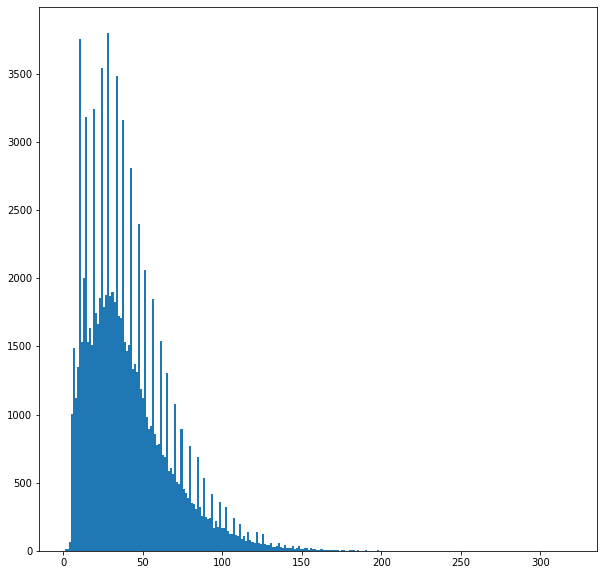

: 

In [53]:

plt.rcParams["figure.figsize"] = (10, 10)

len_list = []

with open("C:/Users/shace/Documents/GitHub/im2latex/5_dataset_large.json", "r") as file:
# with open(FINAL_DATASET, "r") as file:
    dataset = json.load(file)["annotations"]
    for cap in dataset:
        len_list.append(len(list(filter(lambda x: len(x) != 0, cap["caption"].split(" ")))))

plt.hist(len_list, 250)

# s = sorted(len_list)
# print(s[-50:])

# plt.hist(s[:-150], 260)
# print(s[-150:-50])

In [13]:
all_tokens = Counter()

with open(FINAL_DATASET, "r") as file:
    dataset = json.load(file)["annotations"]
    for cap in dataset:
        [all_tokens.update([token]) for token in list(filter(lambda x: len(x) != 0, cap["caption"].split(" ")))]

all_tokens.most_common(1000)

# manually clean following tokens:
# \\textbf{GL --> \\textbf { GL
# \\mathrm{proj --> \\mathrm { proj 
# \\stackrel{\\mathbbP --> DEL
# dist_{H --> dist _ { H
# \\mathbb{G --> DEL
# \\multii = ( 2 , 3 , 3 , 4 , 3 ) --> DEL
# Hom-ext --> Hom - ext
# max~arg --> max ~ arg
# f,tx --> f , tx
# Li_{3/2 --> Li _ { 3 / 2
# \\stackrel{a.s. --> \stackrel { a . s .
# BP,el --> BP , el
# \\stackrel{{\\mathcal{D --> \\stackrel { { \\mathcal { D
# \\mathbb{R --> DEL
# agg,dBm --> agg , dBm 
# \\mathrm{Hom --> \\mathrm { Hom 
# \\stackrel{i.i.d. --> \\stackrel { i . i . d .
# \tr --> \mathrm { tr } ~
# \ev --> DEL
# \abs --> DEL

[('}', 1033143),
 ('{', 1033114),
 ('_', 411018),
 ('^', 215645),
 (')', 200501),
 ('(', 200300),
 ('1', 162559),
 (',', 153299),
 ('2', 129800),
 ('=', 116113),
 ('-', 100656),
 ('0', 97316),
 ('\\mathrm', 79897),
 ('i', 75657),
 ('+', 69626),
 ('n', 62801),
 ('t', 57274),
 ('x', 56252),
 ('.', 50393),
 ('~', 48181),
 ('\\frac', 47410),
 ('k', 44639),
 ('d', 37946),
 ('a', 37261),
 ('|', 36665),
 ('r', 35347),
 ('s', 33728),
 ('\\mathcal', 33164),
 ('m', 32636),
 ('e', 32144),
 ('p', 31892),
 ('j', 31610),
 ('c', 30821),
 ('3', 30477),
 ('f', 28414),
 ('/', 24825),
 ('\\in', 24653),
 ('T', 24333),
 ('\\prime', 23480),
 ('R', 23438),
 ('u', 23360),
 ('\\mathbf', 22481),
 ('A', 21995),
 ('\\alpha', 21949),
 ('N', 21193),
 ('S', 20546),
 ('y', 20287),
 ('\\boldsymbol', 20144),
 ('4', 20056),
 ('\\right)', 19736),
 ('\\left(', 19723),
 ('b', 19195),
 ('M', 19069),
 ('L', 18993),
 ('\\lambda', 18704),
 ('C', 18695),
 ('B', 18549),
 ('\\mathbb', 18287),
 ('g', 18247),
 ('P', 18229),
 ('l', 

In [16]:
all_tokens = Counter()

with open(FINAL_DATASET, "r") as file:
    dataset = json.load(file)["annotations"]
    for cap in dataset:
        [all_tokens.update([token]) for token in list(filter(lambda x: len(x) != 0, cap["caption"].split(" ")))]

all_tokens.most_common(1000)

[('}', 1033082),
 ('{', 1033079),
 ('_', 410996),
 ('^', 215638),
 (')', 200488),
 ('(', 200287),
 ('1', 162555),
 (',', 153276),
 ('2', 129796),
 ('=', 116108),
 ('-', 100656),
 ('0', 97311),
 ('\\mathrm', 79895),
 ('i', 75657),
 ('+', 69626),
 ('n', 62792),
 ('t', 57274),
 ('x', 56251),
 ('.', 50397),
 ('~', 48183),
 ('\\frac', 47410),
 ('k', 44638),
 ('d', 37946),
 ('a', 37262),
 ('|', 36665),
 ('r', 35344),
 ('s', 33729),
 ('\\mathcal', 33165),
 ('m', 32636),
 ('e', 32143),
 ('p', 31891),
 ('j', 31608),
 ('c', 30821),
 ('3', 30472),
 ('f', 28415),
 ('/', 24823),
 ('\\in', 24652),
 ('T', 24332),
 ('\\prime', 23480),
 ('R', 23437),
 ('u', 23360),
 ('\\mathbf', 22481),
 ('A', 21995),
 ('\\alpha', 21945),
 ('N', 21193),
 ('S', 20546),
 ('y', 20287),
 ('\\boldsymbol', 20144),
 ('4', 20052),
 ('\\right)', 19736),
 ('\\left(', 19723),
 ('b', 19195),
 ('M', 19068),
 ('L', 18993),
 ('\\lambda', 18704),
 ('C', 18695),
 ('B', 18549),
 ('\\mathbb', 18286),
 ('g', 18247),
 ('P', 18227),
 ('l', 

In [19]:
all_tokens_new = set()
all_tokens_old = set()

with open(FINAL_DATASET, "r") as file:
    dataset = json.load(file)["annotations"]
    for cap in dataset:
        [all_tokens_new.update([token]) for token in list(filter(lambda x: len(x) != 0, cap["caption"].split(" ")))]
        
with open("C:/Users/shace/Documents/GitHub/im2latex/5_dataset_large.json", "r") as file:
    dataset = json.load(file)["annotations"]
    for cap in dataset:
        [all_tokens_old.update([token]) for token in list(filter(lambda x: len(x) != 0, cap["caption"].split(" ")))]
        
diff = list(all_tokens_new - all_tokens_old)
